## Lentiviral base-editing reporter plasmids
The C→T reporter circuit was designed to restore a mutated GTG start codon to ATG by C→T base editing of its antisense strand (Extended Data Fig. 2a). In the A→G reporter circuit, EGFP translation was designed to be released by destruction of a TAA stop codon to CAA by A→G base editing of the antisense strand (Extended Data Fig. 2b). To construct the lentiviral C→T base-editing reporter plasmid (pLV-SI-112) and its positive control plasmid (pRS112), reporter cassette fragments were amplified from pLV-eGFP (Addgene 36083) using primer sets 112-V4-BC2-FW/SI680 and RS204/SI627, respectively, and cloned into the EcoRI and BamHI sites of the pLVSIN-CMV-Puro backbone vector (Takara) using T4 DNA ligase (NEB). The lentiviral A→G base-editing reporter plasmid (pLV-SI-121) and its positive control plasmid (pLV-SI-122) were constructed similarly, where reporter cassettes were amplified using primer sets SI760/SI680 and SI761/SI680, respectively.

In [1]:
%matplotlib inline
import sys 
sys.path.append("../../")
from dbrick import *
from vis_dbricks import *
hoge = Dbrick(seq="CCGGTATGCGTCGA")
hoge.print_dsdna()
fuga = Dbrick(seq="CCGGTATGCG----/----ATACGCAGCT")
fuga.print_dsdna()

CCGGTATGCGTCGA
GGCCATACGCAGCT
CCGGTATGCG    
    ATACGCAGCT


In [2]:
pLV_eGFP   = Dbrick(record="input/addgene_36083.gbk")
pLVSIN_pur = Dbrick(record="input/pLVSIN-CMV_pur.gb")
BC2_FW = Dbrick(record="input/112-V4-BC2-FW.fasta")
SI680  = Dbrick(record="input/SI680.fasta")

In [5]:
#C→T base-editing reporter plasmid (pLV-SI-112) 
BamHI    = Dbrick(seq="GGATCC")
EcoRI    = Dbrick(seq="GAATTC")
insert   = pLV_eGFP[BC2_FW:SI680]
insert.add_feature(BC2_FW, feature_type="primer", qualifiers={"label":"BC2_FW"})
insert.add_feature(SI680, feature_type="primer", qualifiers={"label":"SI680"}, strand=-1)
insert   = insert[EcoRI:BamHI]
insert.print_dsdna()
insert   = shell(insert, "-AATTC/-----G", "G-----/CCTAG-") #Make sticky end
insert.print_dsdna()
backbone = pLVSIN_pur[BamHI:EcoRI]
#backbone = shell(backbone,"-*****/----*","-----*/*****-") #Make sticky end with invalid stracture
backbone = shell(backbone, "-*****/-----*", "*-----/*****-") #Make sticky end
backbone.print_dsdna()
pLV_SI_112 = join_dbricks(insert,backbone,topology="circular")
pLV_SI_112.write("output/pLV-SI-112.gbk")
pLV_SI_112.print_features(detail=True)

The region from start 4758 to end 5476 was extracted. Adapter sequneces were detected at both ends. Right redundant sequence is GGTGAATTCCCGAGCGTGTCAGGGTGACCG, Left redundant sequence is AATTGGATCC.
New feature was added in the range of start 0 to end 49.
New feature was added in the range of start 729 to end 759.
The region from start 4 to end 755 was extracted.
GAATTCCCGA...GTAAGGATCC
CTTAAGGGCT...CATTCCTAGG
AATTCCCGAG...AGTAAG    
    GGGCTC...TCATTCCTAG
The region from start 2835 to end 2808 was extracted.
GATCCAATTC...CCGGTG    
    GTTAAG...GGCCACTTAA
Based on complementary sticky end of each fragment, the Dbrick objects were joined. The sticky end is 'GATC'
Based on complementary sticky end between 3' end and 5' end, the Dbrick object was circularized. The sticky end is 'AATT'
Feature_ID  Label                Type          Start  End   Strand  gene                             product                                  
0           BC2_FW               primer        0      45    + 

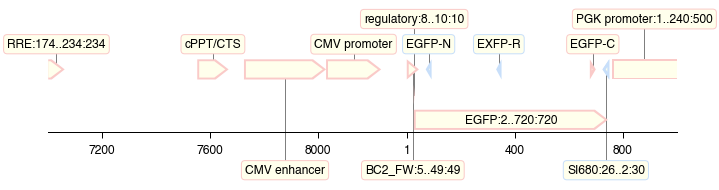

In [6]:
fig = visualize(pLV_SI_112,7000,1000)

###### A→G base-editing reporter plasmid (pLV-SI-121)
SI760 = Dbrick(record="input/SI760.fasta")
insert = pLV_eGFP[SI760:SI680]
insert.add_feature(SI760, feature_type="primer", qualifiers={"label":"RS760"})
insert.add_feature(SI680, feature_type="primer", qualifiers={"label":"SI680"}, strand=-1)
insert = insert[EcoRI:BamHI]
insert = shell(insert, "-*****/-----*", "*-----/*****-")
pRS112 = join_dbricks(insert, backbone, topology="circular")
pRS112.write("output/pLV-SI-121.gbk")